# IMPORTANT LIBRARIES

In [158]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go


* Read Dataset 

In [7]:
df=pd.read_csv('./SalesStore.csv')
df.head()

,Order_Date,Ship_Date,Ship_Mode,Postal_Code,Region,Product_Reference,Category,Sub_Category,Sales,Quantity,Profit,State
0,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
1,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10023012,Office Supplies,Tape,5,1,0.15,OH
2,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10002828,Office Supplies,Tape,5,1,0.15,OH
3,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10022901,Office Supplies,Tape,5,1,0.15,OH
4,2021-02-15,2021-02-20,Ground,44104,Midwest,OFF-TAP-10000482,Office Supplies,Tape,5,1,0.15,OH


In [8]:
df.shape

(216, 12)

In [9]:
df=df.drop(columns=['Postal_Code','Product_Reference'],axis=1)

In [10]:
df.isna().sum()

Order_Date      0
Ship_Date       0
Ship_Mode       0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Profit          0
State           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order_Date    216 non-null    object 
 1   Ship_Date     216 non-null    object 
 2   Ship_Mode     216 non-null    object 
 3   Region        216 non-null    object 
 4   Category      216 non-null    object 
 5   Sub_Category  216 non-null    object 
 6   Sales         216 non-null    int64  
 7   Quantity      216 non-null    int64  
 8   Profit        216 non-null    float64
 9   State         216 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 17.0+ KB


In [12]:
df.describe()

,Sales,Quantity,Profit
count,216.000000,216.000000,216.000000
mean,290.879630,2.393519,5.843287
std,258.750781,1.085959,5.148745
min,5.000000,1.000000,0.150000
25%,50.000000,1.000000,1.000000
50%,200.000000,2.000000,4.000000
75%,450.000000,3.000000,9.000000
max,900.000000,4.000000,18.000000


In [13]:
df.describe(exclude=np.number)

,Order_Date,Ship_Date,Ship_Mode,Region,Category,Sub_Category,State
count,216,216,216,216,216,216,216
unique,41,41,2,4,3,32,9
top,2022-01-18,2022-01-25,Air,South,Office Supplies,Chairs,TX
freq,6,6,110,76,73,13,32


In [14]:
df['Ship_Date']=pd.to_datetime(df.Ship_Date)

In [16]:
df['Order_Date']=pd.to_datetime(df.Order_Date)

# Explore Data And Analysis it

In [17]:
df=df.rename(columns={'Sub_Category':'Products','Region':'Location'})

In [18]:
df.Category.value_counts()

Office Supplies    73
Electronics        72
Furniture          71
Name: Category, dtype: int64

In [19]:
df.Products.unique()


array(['Tape', 'Phones', 'Chairs', 'Sofas', 'Paper', 'Tablets',
       'Speakers', 'Markers', 'Laptops', 'Erasers', 'Beds', 'Pens',
       'Desks', 'Monitors', 'Tables', 'Smartphones', 'Envelopes',
       'Headphones', 'Pencils', 'Storage', 'Notebooks', 'Cameras',
       'Bookcases', 'Glue', 'Smartwatches', 'Outdoor Furniture',
       'Staplers', 'Accessories', 'Rulers', 'Printers', 'Lighting',
       'Scissors'], dtype=object)

 # Distribution Analysis for Sales, Quantity, and Profit

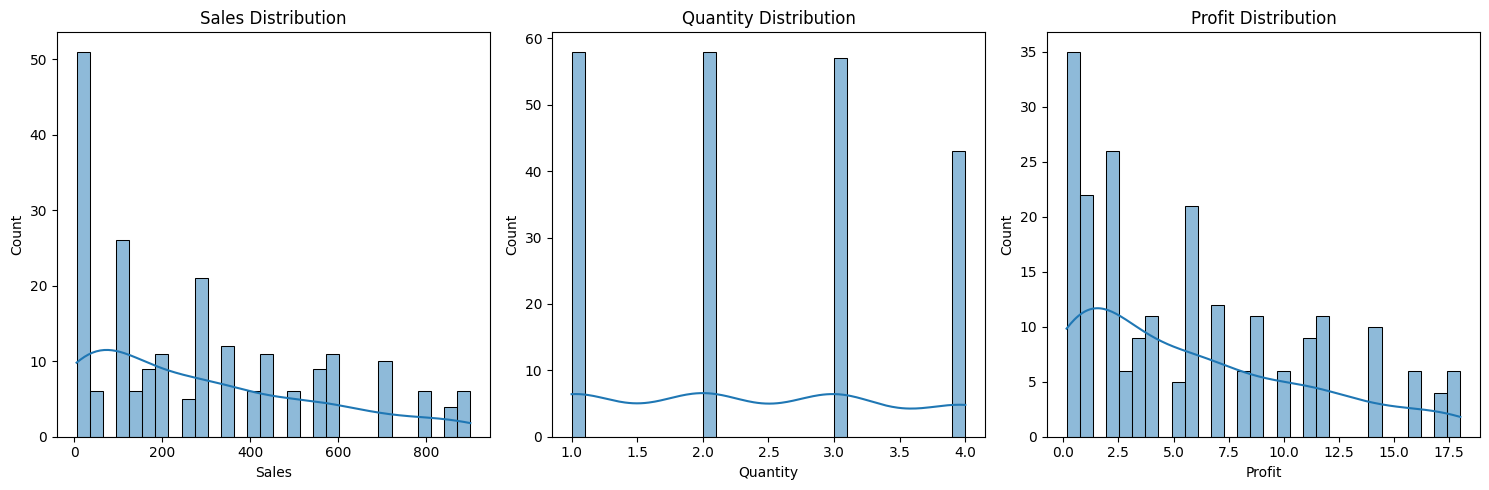

In [30]:
plt.figure(figsize=(15, 5))

# Sales Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Sales Distribution')

# Quantity Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Quantity Distribution')

# Profit Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Profit'], bins=30, kde=True)
plt.title('Profit Distribution')

plt.tight_layout()
plt.show()


# Plotting the trends

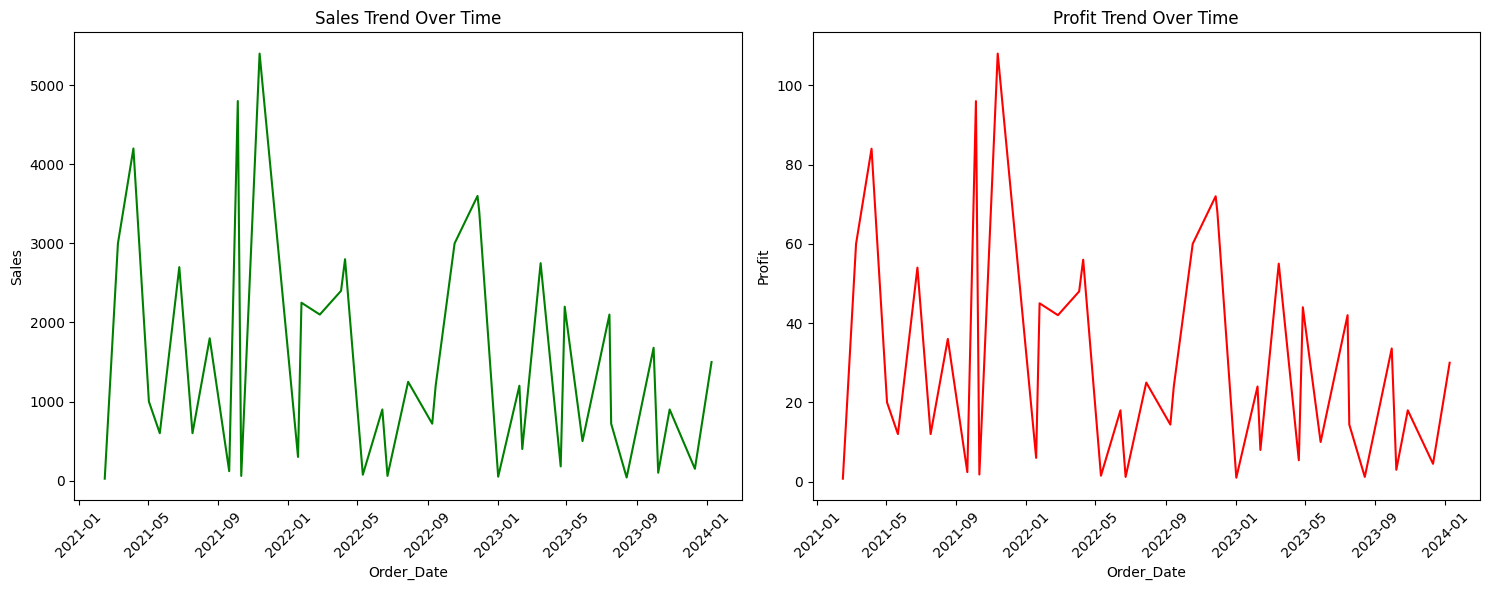

In [29]:
time_series_data = df.groupby('Order_Date').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
plt.figure(figsize=(15, 6))
# Sales Trend
plt.subplot(1, 2, 1)
sns.lineplot(data=time_series_data, x='Order_Date', y='Sales', color='green')
plt.title('Sales Trend Over Time')
plt.xticks(rotation=45)
# Profit Trend
plt.subplot(1, 2, 2)
sns.lineplot(data=time_series_data, x='Order_Date', y='Profit', color='red')
plt.title('Profit Trend Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [159]:
df.State.value_counts()

TX    32
IL    31
OH    30
DC    30
FL    22
GA    22
UT    22
CA    16
WA    11
Name: State, dtype: int64

In [173]:
df[['Products','Category','Ship_Mode']][(df.State=='TX')&(df.Ship_Mode=='Air')].value_counts()

Products           Category     Ship_Mode
Chairs             Furniture    Air          7
Smartwatches       Electronics  Air          6
Outdoor Furniture  Furniture    Air          5
Phones             Electronics  Air          4
Tables             Furniture    Air          4
dtype: int64

In [174]:
label=["Chairs","Smartwatches","Outdoor Furniture" ,"Phones","Tables"]
values=df['Products'][(df.Ship_Mode=='Air')&(df.State=='TX')].value_counts()
go.Figure(data=[go.Pie(labels=label, values=values,  title='Top 5 Products Dlieverd by Air', title_font=dict(size=30), title_position='top center')])


In [25]:
df.Location.unique()

array(['Midwest', 'South', 'West', 'East'], dtype=object)

# Analysis Regions And State

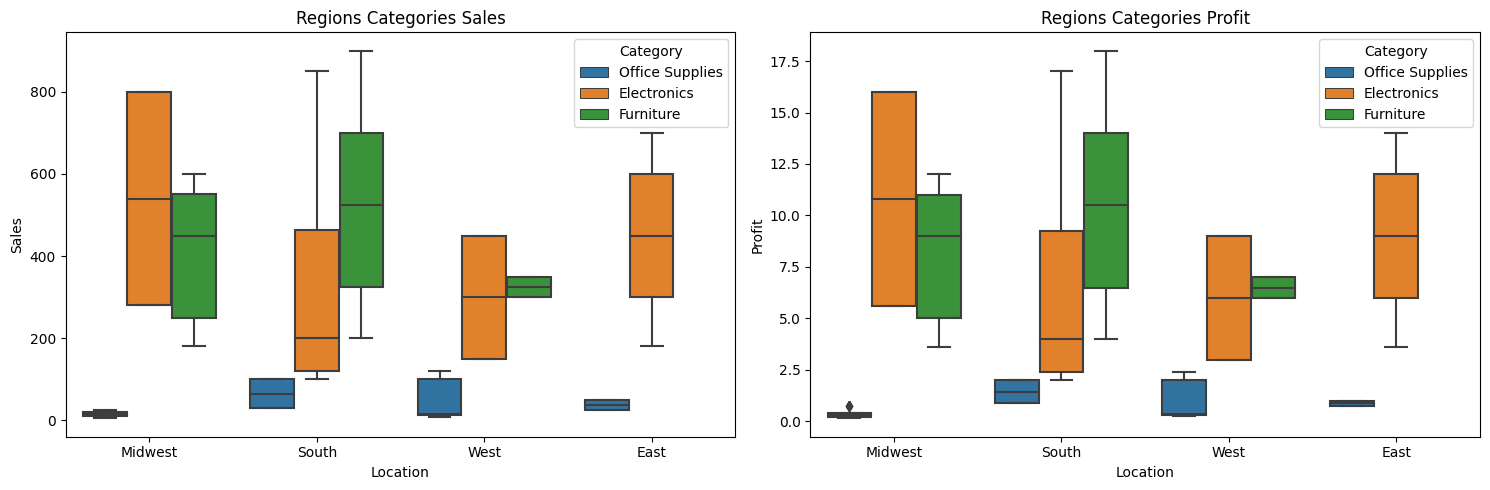

In [183]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='Location',y='Sales',hue='Category')
plt.title('Regions Categories Sales')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Location',y='Profit',hue='Category')
plt.title('Regions Categories Profit')
plt.tight_layout()

# Analyzing Sales and Profit 

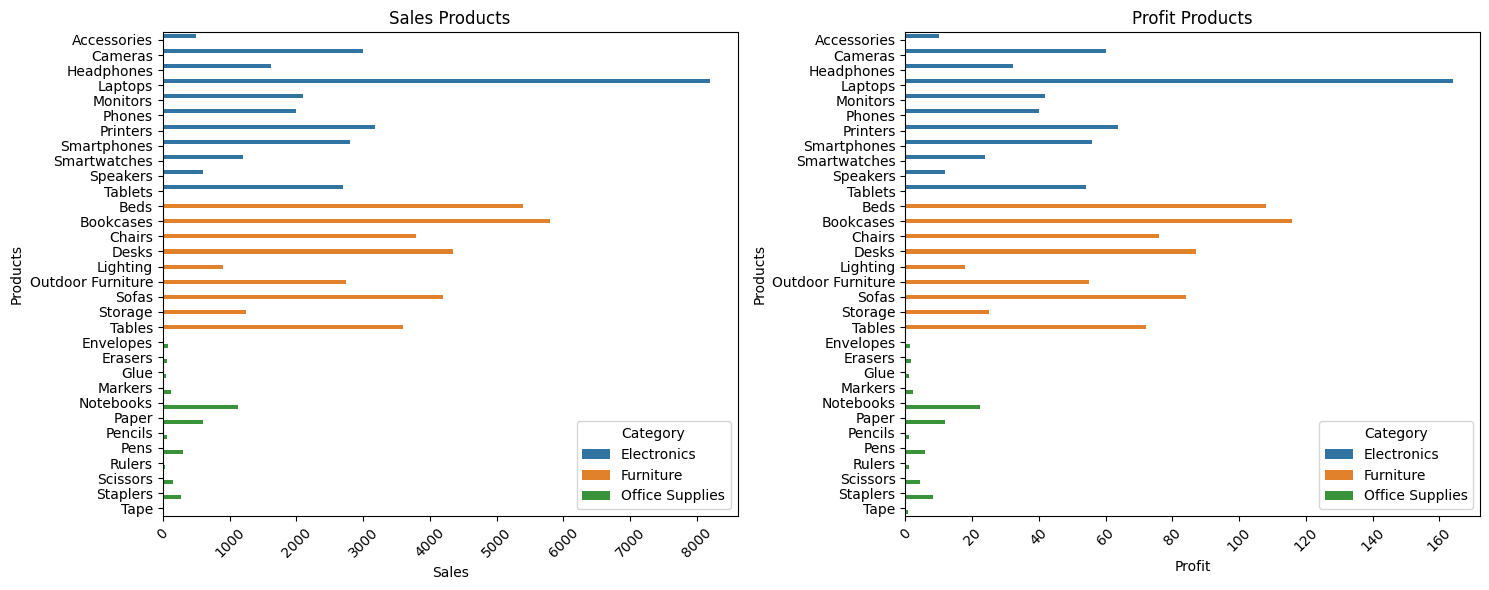

In [156]:
df1 = df.groupby(['Category', 'Products']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, x='Sales', y='Products',hue='Category')
plt.title('Sales Products')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df1, x='Profit', y='Products',hue='Category')
plt.title('Profit Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

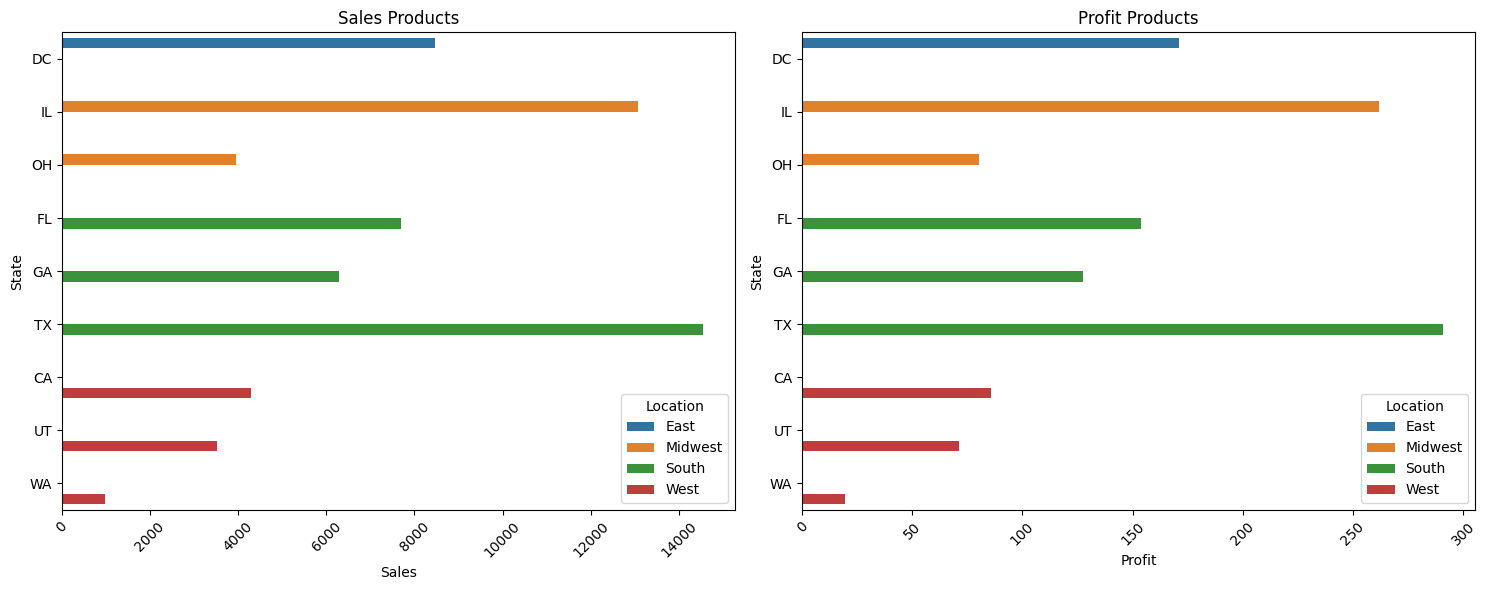

In [157]:
df1 = df.groupby(['Location', 'State']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=df1, x='Sales', y='State',hue='Location')
plt.title('Sales Products')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=df1, x='Profit', y='State',hue='Location')
plt.title('Profit Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:
x=df.State
y=df.Sales
fig=go.Figure(data=go.Box(x=x,y=y,marker=dict(color='#d08d43')))
fig.show()

* ALL ANALYSIS THAT I GET IT FROM THIS DATASET HOPE FOR YOU TO GIVE ME A FEEDBACK TO IMPROVE MY SKILLS aAND TAKE THE ADVICE INTO CONSIDRERATION